In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 주제 : 서울시 공공 자전거 대여 분석
+ 자료 출처
    - https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand
    - https://data.seoul.go.kr/

## 1.  Data Definition

In [2]:
bike = pd.read_csv("data/SeoulBikeData.csv")
bike.tail(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
##### quiz1. 시간대별로 평균 몇대가 대여 되었을까?

bike.groupby("Hour")[["Rented Bike Count"]].mean()

,Rented Bike Count
Hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


Text(16, 150, '퇴근')

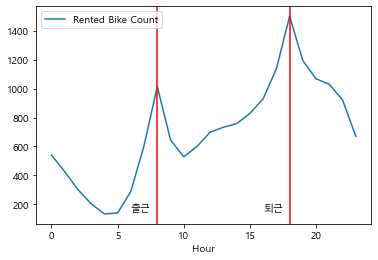

In [13]:
##### quiz2. 시각화

bike.groupby("Hour")[["Rented Bike Count"]].mean().plot()

plt.axvline(x = 8, color="r")
plt.axvline(x = 18, color="r")
plt.text(6, 150, "출근")
plt.text(16, 150, "퇴근")

In [19]:
from datetime import datetime, date

##### 요일별로 평균 몇대가 대여되었을까?

### Date 변수에서 요일을 뽑아서 파생변수 만들기

# Date의 데이터타입을 날짜로 변경
bike["Date"] = pd.to_datetime(bike["Date"], format="%d/%m/%Y")
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [26]:
### 2016년 1월 1일 금요일이다.
diff = bike["Date"] - pd.to_datetime("2016-1-1")
diff

0       700 days
1       700 days
2       700 days
3       700 days
4       700 days
          ...   
8755   1064 days
8756   1064 days
8757   1064 days
8758   1064 days
8759   1064 days
Name: Date, Length: 8760, dtype: timedelta64[ns]

In [27]:
diff = diff.astype(str)
diff

0        700 days
1        700 days
2        700 days
3        700 days
4        700 days
          ...    
8755    1064 days
8756    1064 days
8757    1064 days
8758    1064 days
8759    1064 days
Name: Date, Length: 8760, dtype: object

In [28]:
diff = diff.str.split(" ", expand=True)[0]
diff

0        700
1        700
2        700
3        700
4        700
        ... 
8755    1064
8756    1064
8757    1064
8758    1064
8759    1064
Name: 0, Length: 8760, dtype: object

In [29]:
diff_num = diff.astype(int)
diff_num

0        700
1        700
2        700
3        700
4        700
        ... 
8755    1064
8756    1064
8757    1064
8758    1064
8759    1064
Name: 0, Length: 8760, dtype: int32

In [30]:
def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1:
        return "토요일"
    elif x % 7 == 2:
        return "일요일"
    elif x % 7 == 3:
        return "월요일"
    elif x % 7 == 4:
        return "화요일"
    elif x % 7 == 5:
        return "수요일"
    elif x % 7 == 6:
        return "목요일"
    
bike["weekdays"] = diff_num.apply(weekdays)
bike

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,금요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,금요일


In [31]:
bike.groupby("weekdays")[["Rented Bike Count"]].mean()

,Rented Bike Count
weekdays,
금요일,747.117925
목요일,690.704327
수요일,740.349359
월요일,730.563301
일요일,625.155449
토요일,709.528846
화요일,687.977564


In [38]:
bike["weekdays2"] = ((pd.to_datetime(bike["Date"], format="%d/%m/%Y") 
                                      - pd.to_datetime("2016-1-1")).dt.days) % 7
bike["weekdays2"] = bike["weekdays2"].map({0:"금",
                                          1:"토",
                                          2:"일",
                                          3:"월",
                                          4:"화",
                                          5:"수",
                                          6:"목"})
bike.groupby("weekdays2")[["Rented Bike Count"]].mean()

,Rented Bike Count
weekdays2,
금,747.117925
목,690.704327
수,740.349359
월,730.563301
일,625.155449
토,709.528846
화,687.977564


<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

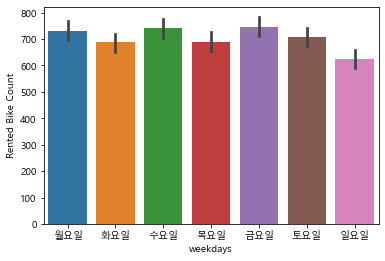

In [40]:
sns.barplot(x = "weekdays", y = "Rented Bike Count", data=bike, 
           order=["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

C:\Users\dbs03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dbs03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dbs03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dbs03\anacond

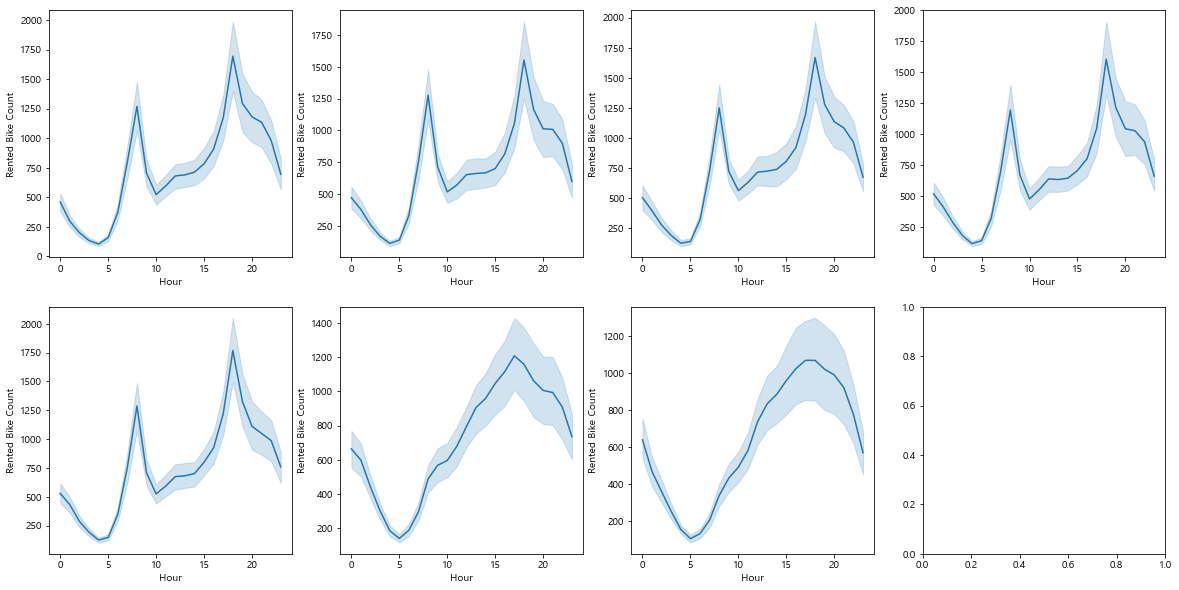

In [50]:
# 요일별로 시간대별로 그래프 시각화

_, axes = plt.subplots(2, 4, figsize=(20, 10))

w_list = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]
for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", 
                    data = bike.loc[bike["weekdays"] == w_list[i]],
                    ax = axes[i//4, i % 4])

In [48]:
axes

array([[<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>,
        <AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)